In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("C:/Animal-crossing-performace/dataset-AH/fish.csv")

In [22]:
novos_nomes = {
    'Where/How': 'where_row',
    'Lighting Type': 'light_type'
}

df = df.rename(columns=novos_nomes)

In [31]:
df.head()

,Name,Sell,where_row,Shadow,Total Catches to Unlock,Spawn Rates,Rain/Snow Catch Up,NH Jan,NH Feb,NH Mar,...,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Size,light_type,Spawn_Rate_Avg
0,anchovy,200,Sea,Small,0,2–5,No,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,...,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,Blue,Red,1x1,No lighting,3.5
1,angelfish,3000,River,Small,20,2–5,No,NaN,NaN,NaN,...,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,Yellow,Black,1x1,Fluorescent,3.5
2,arapaima,10000,River,XX-Large,50,1,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4 PM – 9 AM,Black,Blue,3x2,No lighting,1.0
3,arowana,10000,River,Large,50,1–2,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4 PM – 9 AM,Yellow,Black,2x1,Fluorescent,1.5
4,barred knifejaw,5000,Sea,Medium,20,3–5,No,NaN,NaN,All day,...,NaN,All day,All day,All day,All day,White,Black,1x1,Fluorescent,4.0


In [17]:
df.isnull().sum()

#                           0
Name                        0
Sell                        0
Where/How                   0
Shadow                      0
Total Catches to Unlock     0
Spawn Rates                 0
Rain/Snow Catch Up          0
NH Jan                     49
NH Feb                     49
NH Mar                     45
NH Apr                     41
NH May                     36
NH Jun                     25
NH Jul                     22
NH Aug                     20
NH Sep                     17
NH Oct                     38
NH Nov                     43
NH Dec                     48
SH Jan                     22
SH Feb                     20
SH Mar                     17
SH Apr                     38
SH May                     43
SH Jun                     48
SH Jul                     49
SH Aug                     49
SH Sep                     45
SH Oct                     41
SH Nov                     36
SH Dec                     25
Color 1                     0
Color 2   

In [30]:
cols_to_drop = [
    "Icon Filename",
    "Critterpedia Filename",
    "Furniture Filename",
    "Internal ID",
    "Unique Entry ID",
    "#"
]

df= df.drop(columns=cols_to_drop)


In [ ]:
def clean_spawn_rates(rate):
    if pd.isna(rate):
        return np.nan
    if isinstance(rate, str):
        # Remove caracteres não numéricos exceto traço e ponto
        if '–' in rate: # Travessão
            low, high = rate.split('–')
            return (float(low) + float(high)) / 2
        elif '-' in rate: # Hífen comum
            low, high = rate.split('-')
            return (float(low) + float(high)) / 2
        else:
            try:
                return float(rate)
            except ValueError:
                return np.nan
    return rate

df['Spawn_Rate_Avg'] = df['Spawn Rates'].apply(clean_spawn_rates)

Tramento inicial ode removo valores nulos ou incositentes e troquei o nome de duas colunas para não dar erro na criação dos modelos 

C:\Users\rozan\AppData\Local\Temp\ipykernel_10800\572117136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Where/How', y='Sell', data=df, palette="Set2")


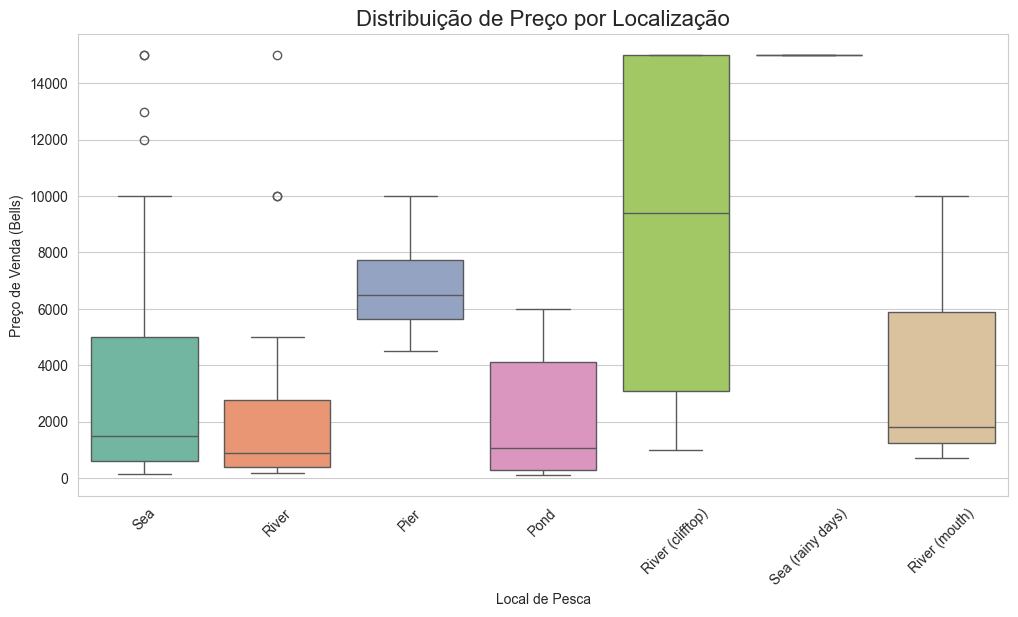

In [7]:
plt.figure(figsize=(12, 6))

# Boxplot para mostrar a distribuição de preços por local
sns.boxplot(x='Where/How', y='Sell', data=df, palette="Set2")

plt.title('Distribuição de Preço por Localização', fontsize=16)
plt.ylabel('Preço de Venda (Bells)')
plt.xlabel('Local de Pesca')
plt.xticks(rotation=45)
plt.show()

# graficos para seleção de features

C:\Users\rozan\AppData\Local\Temp\ipykernel_10800\1535730705.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shadow', y='Sell', data=df, order=existing_order, palette="Set1")


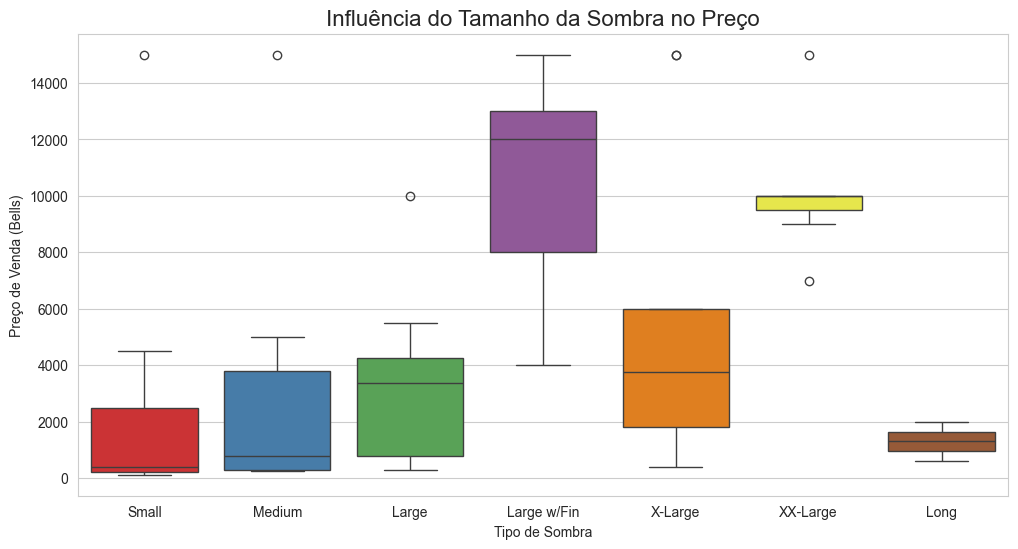

In [9]:
plt.figure(figsize=(12, 6))

# Definindo ordem lógica para o gráfico ficar organizado
shadow_order = ['Small', 'Medium', 'Large', 'Large w/Fin', 'X-Large', 'XX-Large', 'Narrow', 'Long']
# Filtra apenas as sombras que realmente existem no seu arquivo
existing_order = [s for s in shadow_order if s in df['Shadow'].unique()]

# Plot
sns.boxplot(x='Shadow', y='Sell', data=df, order=existing_order, palette="Set1")

plt.title('Influência do Tamanho da Sombra no Preço', fontsize=16)
plt.ylabel('Preço de Venda (Bells)')
plt.xlabel('Tipo de Sombra')
plt.show()

tamanho e localidade afetam bastante o preço do peixe

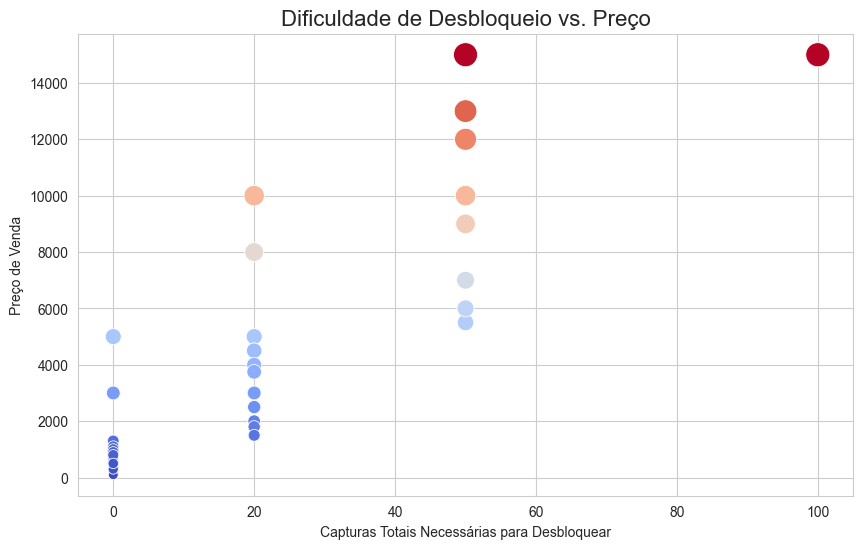

In [10]:
plt.figure(figsize=(10, 6))

# Scatterplot para ver correlação
sns.scatterplot(x='Total Catches to Unlock', y='Sell', data=df, 
                hue='Sell', size='Sell', sizes=(50, 300), palette='coolwarm', legend=False)

plt.title('Dificuldade de Desbloqueio vs. Preço', fontsize=16)
plt.xlabel('Capturas Totais Necessárias para Desbloquear')
plt.ylabel('Preço de Venda')
plt.show()

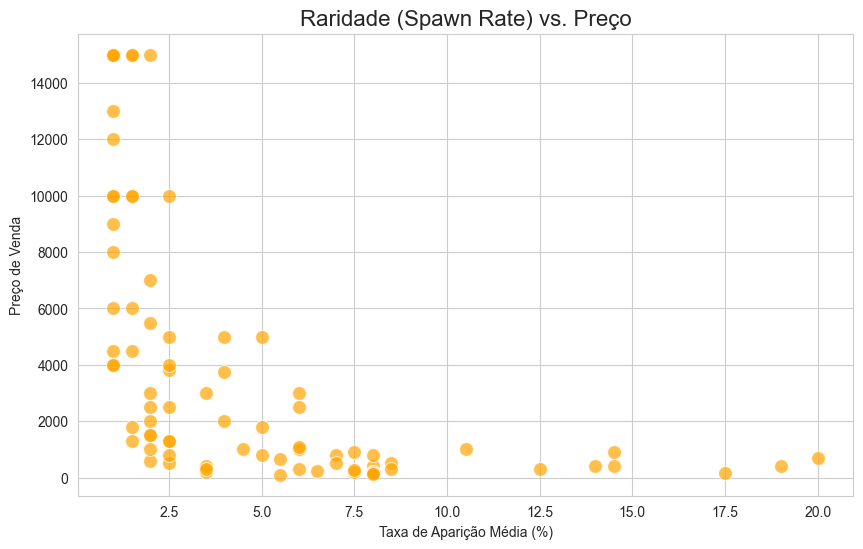

Correlação Estatística (Spawn Rate vs Sell): -0.52


In [11]:
plt.figure(figsize=(10, 6))

# Usamos a coluna limpa na Célula 1
sns.scatterplot(x='Spawn_Rate_Avg', y='Sell', data=df, color='orange', s=100, alpha=0.7)

plt.title('Raridade (Spawn Rate) vs. Preço', fontsize=16)
plt.xlabel('Taxa de Aparição Média (%)')
plt.ylabel('Preço de Venda')

# Inverter o eixo X pode ser útil visualmente (Raros à esquerda)
# plt.gca().invert_xaxis() 

plt.show()

# Calcular a correlação exata
correlacao = df['Spawn_Rate_Avg'].corr(df['Sell'])
print(f"Correlação Estatística (Spawn Rate vs Sell): {correlacao:.2f}")

# interpretação 
quanto mais dificil de pegar o peixe mais raro

In [13]:
nh_months = ['NH Jan', 'NH Feb', 'NH Mar', 'NH Apr', 'NH May', 'NH Jun', 
             'NH Jul', 'NH Aug', 'NH Sep', 'NH Oct', 'NH Nov', 'NH Dec']

# 2. Criar a Matriz de Disponibilidade Binária
# 1 = Disponível (não é NaN); 0 = Indisponível (é NaN)
availability_df = df[nh_months].notna().astype(int)

# 3. Adicionar colunas chave e calcular a sazonalidade total
availability_df['Name'] = df['Name']
availability_df['Sell'] = df['Sell']
# 'Months_Active' é o total de meses em que o peixe está disponível
availability_df['Months_Active'] = availability_df[nh_months].sum(axis=1)

# Configuração visual
sns.set_style("whitegrid")

print("Preparação concluída. Matriz de disponibilidade criada.")
print(availability_df[['Name', 'Sell', 'Months_Active']].head())

Preparação concluída. Matriz de disponibilidade criada.
              Name   Sell  Months_Active
0          anchovy    200             12
1        angelfish   3000              6
2         arapaima  10000              4
3          arowana  10000              4
4  barred knifejaw   5000              9


C:\Users\rozan\AppData\Local\Temp\ipykernel_10800\1963774376.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=monthly_counts.index, y=monthly_counts.values, palette="Blues_d")
C:\Users\rozan\AppData\Local\Temp\ipykernel_10800\1963774376.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
C:\Users\rozan\AppData\Local\Temp\ipykernel_10800\1963774376.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='Months_Active', y='Sell', data=availability_df, palette="Set3")
C:\Users\rozan\AppData\Local\Temp\ipykernel_10800\1963774

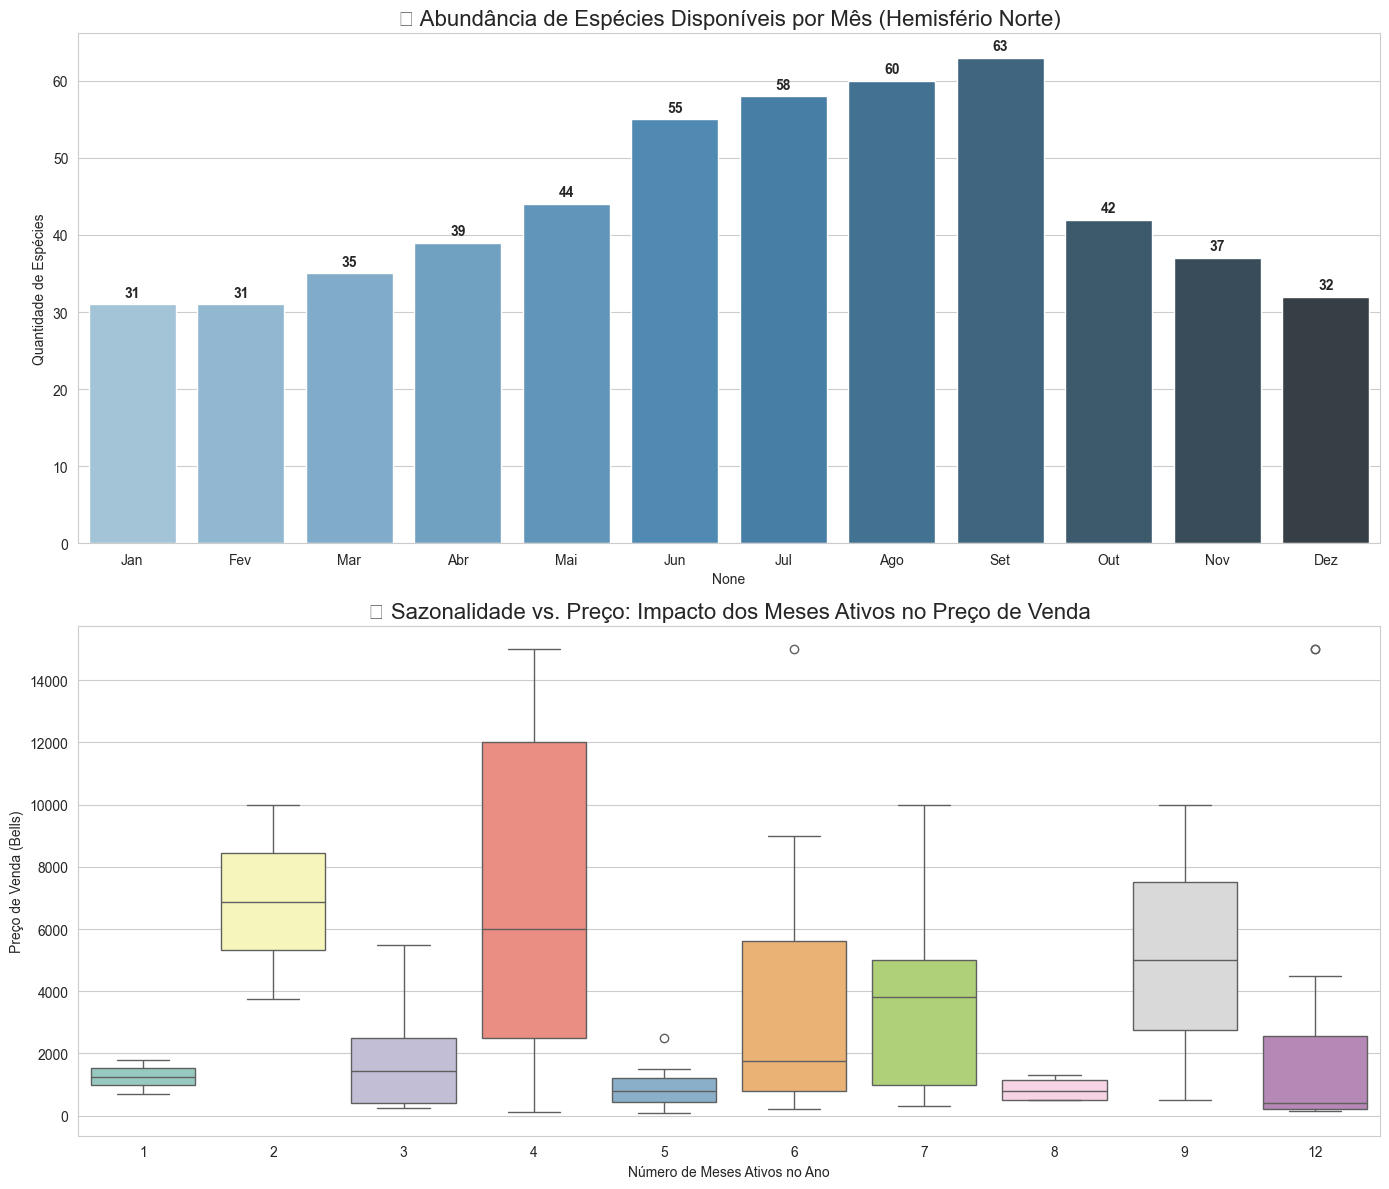

In [ ]:
# GRÁFICOS DE ANÁLISE DE SAZONALIDADE E PREÇO

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# --- GRÁFICO A: Abundância Mensal ---
# Soma o total de espécies disponíveis em cada mês (contagem de '1's na coluna)
monthly_counts = availability_df[nh_months].sum()
sns.barplot(ax=axes[0], x=monthly_counts.index, y=monthly_counts.values, palette="Blues_d")
axes[0].set_title(' Abundância de Espécies Disponíveis por Mês (Hemisfério Norte)', fontsize=16)
axes[0].set_ylabel('Quantidade de Espécies')
axes[0].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
axes[0].tick_params(axis='x', rotation=0)

# Adicionar rótulos nas barras
for i, v in enumerate(monthly_counts.values):
    axes[0].text(i, v + 1, str(v), ha='center', fontweight='bold')


# --- GRÁFICO B: Sazonalidade vs. Preço ---
# Boxplot para comparar o preço de peixes que aparecem por mais tempo vs. menos tempo
sns.boxplot(ax=axes[1], x='Months_Active', y='Sell', data=availability_df, palette="Set3")
axes[1].set_title('💰 Sazonalidade vs. Preço: Impacto dos Meses Ativos no Preço de Venda', fontsize=16)
axes[1].set_xlabel('Número de Meses Ativos no Ano')
axes[1].set_ylabel('Preço de Venda (Bells)')

plt.tight_layout()
plt.show()

## apesar da sazionalidae ser importate para o preço do peixe existem variaveis mais promissoras

<Axes: xlabel='light_type', ylabel='Sell'>

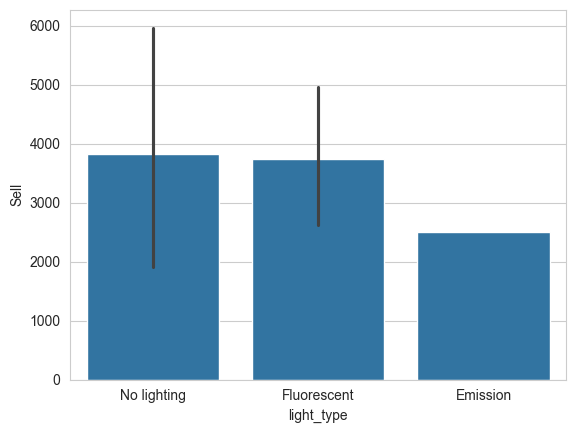

In [32]:
sns.barplot(data=df,x='light_type',y="Sell")

In [33]:
df.to_parquet("C:/Animal-crossing-performace/linear_regression/fish_processed.parquet", index=False)

## **Seleção de Features**

Com base na análise dos gráficos, nas curvas ROC e no comportamento dos modelos durante os experimentos, foram selecionadas as seguintes features para compor a versão final do modelo:

- **where_row**  
- **Shadow**  
- **light_type**  
- **Total Catches to Unlock**  
- **Spawn_Rate_Avg**

Essas variáveis foram escolhidas por apresentarem maior relevância preditiva, melhor relação com as classes e contribuição direta para a melhoria do desempenho dos modelos. Além disso, elas refletem características importantes do comportamento dos elementos no jogo, o que torna as previsões mais consistentes e interpretáveis.
